In [1]:
import pandas as pd
import numpy as np
import os

## concatenating dfs from different runs of loadign transcripts

In [145]:
df = pd.read_pickle("C:\\Users\\caneu\\Downloads\\embeddings_and_info.pkl")

In [144]:
df1 = pd.read_pickle("C:\\Users\\caneu\\Downloads\\embeddings_and_info2.pkl")

In [148]:
df = pd.concat([df, df1])

In [235]:
meta_data = pd.read_pickle('C:\\Users\\caneu\\Downloads\\meta_data_embeddings.pkl')

In [286]:
new_meta = meta_data[~meta_data['episode_description'].str.contains('anchor', case=False, na=False)]

## Edscriptions that mention anchor are part of podcasts throught aht platform that all have the same ending text. I've removed them so they don't throw off similarity calculations

In [287]:
# Assuming 'rw' is the column in df from which you want to strip '.json'
df['episode_id'] = df['episode_id'].str.rstrip('.json')


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   show_id     50000 non-null  object
 1   episode_id  50000 non-null  object
 2   transcript  50000 non-null  object
 3   embeddings  50000 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [288]:
new_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63610 entries, 0 to 105358
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   show_uri                 63610 non-null  object 
 1   show_name                63610 non-null  object 
 2   show_description         63610 non-null  object 
 3   publisher                63610 non-null  object 
 4   language                 63610 non-null  object 
 5   rss_link                 63610 non-null  object 
 6   episode_uri              63610 non-null  object 
 7   episode_name             63610 non-null  object 
 8   episode_description      63406 non-null  object 
 9   duration                 63610 non-null  float64
 10  show_filename_prefix     63610 non-null  object 
 11  episode_filename_prefix  63610 non-null  object 
 12  name_embeds              63610 non-null  object 
 13  name_embeds1             63610 non-null  object 
 14  description_embeds   

## merge the meta data and transcript

In [290]:
import pandas as pd

# Assuming 'episode_id' is the common column in df and 'episode_filename_prefix' is the common column in meta_data
merged_df = pd.merge(df, new_meta, left_on='episode_id', right_on='episode_filename_prefix')


In [291]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27687 entries, 0 to 27686
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   show_id                  27687 non-null  object 
 1   episode_id               27687 non-null  object 
 2   transcript               27687 non-null  object 
 3   embeddings               27687 non-null  object 
 4   show_uri                 27687 non-null  object 
 5   show_name                27687 non-null  object 
 6   show_description         27687 non-null  object 
 7   publisher                27687 non-null  object 
 8   language                 27687 non-null  object 
 9   rss_link                 27687 non-null  object 
 10  episode_uri              27687 non-null  object 
 11  episode_name             27687 non-null  object 
 12  episode_description      27600 non-null  object 
 13  duration                 27687 non-null  float64
 14  show_filename_prefix  

# Experimenting with different embedding representations

In [364]:
embeddings_array = np.array(merged_df['embeddings'].tolist())
name_embeds1_array = np.array(merged_df['name_embeds1'].tolist())
description_embeds_array = np.array(merged_df['description_embeds'].tolist())



In [383]:
# Concatenate the arrays along axis=2 (third dimension)
combined_embeddings = np.concatenate([embeddings_array, name_embeds1_array, description_embeds_array], axis=2)

# Reshape the resulting 3D tensor to a 2D array for cosine similarity calculation
combined_embeddings_2d = combined_embeddings.reshape(-1, combined_embeddings.shape[2])
combined_embeddings_2d.shape

(27687, 2304)

In [384]:
#maximum pooling

pooled_embedding = np.max(combined_embeddings, axis=0)
pooled_embeddings_2d = pooled_embeddings.reshape(-1, pooled_embeddings.shape[2])
pooled_embeddings_2d.shape

(27687, 768)

In [385]:
#Just transcript

transcript_embeddings_2d = embeddings_array.reshape(-1, embeddings_array.shape[2])
transcript_embeddings_2d.shape

(27687, 768)

In [294]:
embeddings_test = combined_embeddings_2d


## Normalizing embeddings

In [386]:
from sklearn.preprocessing import normalize
embeddings_np = np.array([np.array(e).flatten() for e in combined_embeddings_2d])

normalized_concat_embedding = normalize(embeddings_np, norm='l2')

embeddings_np = np.array([np.array(e).flatten() for e in pooled_embeddings_2d])

normalized_pooled_embedding = normalize(embeddings_np, norm='l2')

embeddings_np = np.array([np.array(e).flatten() for e in transcript_embeddings_2d])

normalized_transcript_embedding = normalize(embeddings_np, norm='l2')



## Feature reduction with T-SNE to capture local relationships

C:\Users\caneu\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 27687 samples in 0.063s...
[t-SNE] Computed neighbors for 27687 samples in 107.005s...
[t-SNE] Computed conditional probabilities for sample 1000 / 27687
[t-SNE] Computed conditional probabilities for sample 2000 / 27687
[t-SNE] Computed conditional probabilities for sample 3000 / 27687
[t-SNE] Computed conditional probabilities for sample 4000 / 27687
[t-SNE] Computed conditional probabilities for sample 5000 / 27687
[t-SNE] Computed conditional probabilities for sample 6000 / 27687
[t-SNE] Computed conditional probabilities for sample 7000 / 27687
[t-SNE] Computed conditional probabilities for sample 8000 / 27687
[t-SNE] Computed conditional probabilities for sample 9000 / 27687
[t-SNE] Computed conditional probabilities for sample 10000 / 27687
[t-SNE] Computed conditional probabilities for sample 11000 / 27687
[t-SNE] Computed conditional probabilities for sample 12000 / 27687
[t-SNE] Computed conditional probabilities for s

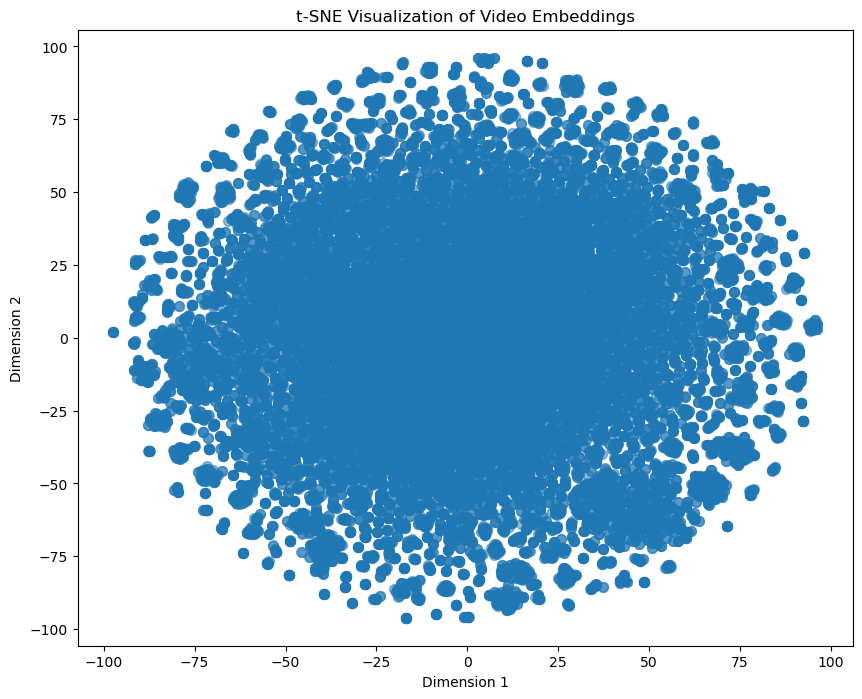

In [393]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import tqdm


tsne = TSNE(n_components=2, perplexity=5, learning_rate=200, n_iter=1000, random_state=2023, verbose = 2)


embedded_videos = tsne.fit_transform(normalized_concat_embedding)

# Plot the reduced embeddings
plt.figure(figsize=(10, 8))
plt.scatter(embedded_videos[:, 0], embedded_videos[:, 1], s=50, alpha=0.5)
plt.title('t-SNE Visualization of Video Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## Find Similarity metrc for each dataset

In [392]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


concat_sims = cosine_similarity(normalized_concat_embedding[:10000])
pooled_sims = cosine_similarity(normalized_pooled_embedding[:10000])
transcript_sims = cosine_similarity(normalized_transcript_embedding[:10000])

In [396]:
np.fill_diagonal(concat_sims, 0)
np.fill_diagonal(pooled_sims, 0)
np.fill_diagonal(transcript_sims, 0)

# Analyzing the quality of similarity measures and find the one that best represents the text similarity

#### Concatenated embeddings

In [441]:
index_investigating = 1692

In [442]:
most_similar_indices = np.argsort(concat_sims[index_investigating])[-1:][::-1]
print(most_similar_indices)

[3920]


In [443]:
pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')
merged_df[merged_df.index == index_investigating]

,show_id,episode_id,transcript,embeddings,show_uri,show_name,show_description,publisher,language,rss_link,episode_uri,episode_name,episode_description,duration,show_filename_prefix,episode_filename_prefix,name_embeds,name_embeds1,description_embeds
1692,show_0CvqGkWWK2fsMvHlHoyDAd,33e3AVZp7KVvLqirSr6n7p,"Hi everyone, it's me. Anna. I know you haven't...","[[1.2673008, 1.8411605, 1.8411878, 1.0559602, ...",spotify:show:0CvqGkWWK2fsMvHlHoyDAd,Weight loss journey inspiration,In this podcast I will go in to discussing the...,Weightloss journey inspiration,['en'],https://anchor.fm/s/8f6af74/podcast/rss,spotify:episode:33e3AVZp7KVvLqirSr6n7p,Finding yourself when lost,Finding yourself in a world where nothing make...,6.654833,show_0CvqGkWWK2fsMvHlHoyDAd,33e3AVZp7KVvLqirSr6n7p,"[[0.9214708, 0.34951836, 0.48024032, 0.6850053...","[[0.74274427, 0.10249366, 0.409533, 0.366854, ...","[[0.9214708, 0.34951836, 0.48024032, 0.6850053..."


In [444]:
merged_df[merged_df.index == most_similar_indices[0]]

,show_id,episode_id,transcript,embeddings,show_uri,show_name,show_description,publisher,language,rss_link,episode_uri,episode_name,episode_description,duration,show_filename_prefix,episode_filename_prefix,name_embeds,name_embeds1,description_embeds
3920,show_0mdk9E6jM97FXaSrh00JVe,5yNxb7bRcivhzLh0b07bXa,"Yes, yes. Yes. Yes, this is Gerald Peters. Wel...","[[1.7461216, 1.4157141, 1.5158241, 0.93722296,...",spotify:show:0mdk9E6jM97FXaSrh00JVe,The Money Flow - Conversations in my Truck abo...,"Gerald Peters is an author, real estate invest...",Gerald Peters,['en'],https://anchor.fm/s/bc55930/podcast/rss,spotify:episode:5yNxb7bRcivhzLh0b07bXa,Finding Your Truth in investing and trading.,Finding Your Truth in investing and trading. D...,18.563967,show_0mdk9E6jM97FXaSrh00JVe,5yNxb7bRcivhzLh0b07bXa,"[[1.0393208, 0.47200084, 0.59772825, 0.6120218...","[[1.1719598, 0.24971175, 0.18198723, 0.5300975...","[[1.0393208, 0.47200084, 0.59772825, 0.6120218..."


#### pooled embeddings

In [445]:
most_similar_indices = np.argsort(pooled_sims[index_investigating])[-1:][::-1]
print(most_similar_indices)

[9587]


In [446]:
merged_df[merged_df.index == index_investigating]

,show_id,episode_id,transcript,embeddings,show_uri,show_name,show_description,publisher,language,rss_link,episode_uri,episode_name,episode_description,duration,show_filename_prefix,episode_filename_prefix,name_embeds,name_embeds1,description_embeds
1692,show_0CvqGkWWK2fsMvHlHoyDAd,33e3AVZp7KVvLqirSr6n7p,"Hi everyone, it's me. Anna. I know you haven't...","[[1.2673008, 1.8411605, 1.8411878, 1.0559602, ...",spotify:show:0CvqGkWWK2fsMvHlHoyDAd,Weight loss journey inspiration,In this podcast I will go in to discussing the...,Weightloss journey inspiration,['en'],https://anchor.fm/s/8f6af74/podcast/rss,spotify:episode:33e3AVZp7KVvLqirSr6n7p,Finding yourself when lost,Finding yourself in a world where nothing make...,6.654833,show_0CvqGkWWK2fsMvHlHoyDAd,33e3AVZp7KVvLqirSr6n7p,"[[0.9214708, 0.34951836, 0.48024032, 0.6850053...","[[0.74274427, 0.10249366, 0.409533, 0.366854, ...","[[0.9214708, 0.34951836, 0.48024032, 0.6850053..."


In [447]:
merged_df[merged_df.index == most_similar_indices[0]]

,show_id,episode_id,transcript,embeddings,show_uri,show_name,show_description,publisher,language,rss_link,episode_uri,episode_name,episode_description,duration,show_filename_prefix,episode_filename_prefix,name_embeds,name_embeds1,description_embeds
9587,show_1GXIhXvi43y9sYVwyvBM1O,5rSv34rclUcifLpQAlmmLN,I'm gonna mow Guru Dev Namo. This is QA on the...,"[[2.0058699, 1.3925545, 1.6354237, 1.0118215, ...",spotify:show:1GXIhXvi43y9sYVwyvBM1O,Everest Asher Show,Everest Asher is a spiritual teacher and mothe...,Everest Asher,['en'],https://anchor.fm/s/ee856d0/podcast/rss,spotify:episode:5rSv34rclUcifLpQAlmmLN,"Q&A: January 6, 2020",Everest answers the questions: 1.) Where does ...,68.4072,show_1GXIhXvi43y9sYVwyvBM1O,5rSv34rclUcifLpQAlmmLN,"[[1.0157174, 0.74116725, 1.6372215, 0.63666785...","[[0.6408009, 0.32232258, 1.8715026, 0.38036186...","[[1.0157174, 0.74116725, 1.6372215, 0.63666785..."


#### transcript embeddings

In [448]:
most_similar_indices = np.argsort(transcript_sims[index_investigating])[-1:][::-1]
print(most_similar_indices)

[9587]


In [449]:
merged_df[merged_df.index == index_investigating]

,show_id,episode_id,transcript,embeddings,show_uri,show_name,show_description,publisher,language,rss_link,episode_uri,episode_name,episode_description,duration,show_filename_prefix,episode_filename_prefix,name_embeds,name_embeds1,description_embeds
1692,show_0CvqGkWWK2fsMvHlHoyDAd,33e3AVZp7KVvLqirSr6n7p,"Hi everyone, it's me. Anna. I know you haven't...","[[1.2673008, 1.8411605, 1.8411878, 1.0559602, ...",spotify:show:0CvqGkWWK2fsMvHlHoyDAd,Weight loss journey inspiration,In this podcast I will go in to discussing the...,Weightloss journey inspiration,['en'],https://anchor.fm/s/8f6af74/podcast/rss,spotify:episode:33e3AVZp7KVvLqirSr6n7p,Finding yourself when lost,Finding yourself in a world where nothing make...,6.654833,show_0CvqGkWWK2fsMvHlHoyDAd,33e3AVZp7KVvLqirSr6n7p,"[[0.9214708, 0.34951836, 0.48024032, 0.6850053...","[[0.74274427, 0.10249366, 0.409533, 0.366854, ...","[[0.9214708, 0.34951836, 0.48024032, 0.6850053..."


In [454]:
pd.set_option('display.max_colwidth', None)
merged_df[merged_df.index == most_similar_indices[0]]['episode_description']

9587    Everest answers the questions: 1.) Where does the concept of acceptance come in when it comes to illnesses 2.) How do you create more time for yourself as a mother 3.) How to stop tolerating people that don't treat you right 4.) What are the three forces of the manifesting process 5.) How to identify the voice of God from the voice of your mind  
Name: episode_description, dtype: object

In [ ]:
pd.reset_option('display.max_colwidth')

## There's different things to note about each method. The case of concatenation is shown to emphasize all three parts equally. THis can be seen in the example above where a podcast about weight loss titled and described "Finding Yourself when lost" is most similar to a podcast titled "FInding yourself when lost" about finance. This could be considered a similarity, but the transcript information leads us to believe that the most similar is a Q/A about spirituality. Neither of these podcasts deal directly with weight loss, but both can be deemed similar baed on context.

#### I want to try and develop a neural network method that can hopefully take some of these results and go further into developing more nuanced similarity measures